In [2]:
# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
df = pd.read_csv('Mars Crater info.csv')
df.head()

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0


In [5]:
df.shape

(384343, 10)

In [6]:
# summary stats
df.describe(include='all')

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
count,384343,384343,384343.000000,384343.000000,384343.000000,384343.000000,384343,384343,384343,384343.000000
unique,384343,986,NaN,NaN,NaN,NaN,156,104,29,NaN
top,01-000000,,NaN,NaN,NaN,NaN,,,,NaN
freq,1,383356,NaN,NaN,NaN,NaN,339718,364867,383050,NaN
mean,NaN,NaN,-7.199209,10.128021,3.556686,0.075838,NaN,NaN,NaN,0.064835
std,NaN,NaN,33.608966,96.641592,8.591993,0.221518,NaN,NaN,NaN,0.304889
min,NaN,NaN,-86.700000,-179.997000,1.000000,-0.420000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,-30.935000,-58.829000,1.180000,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,-10.079000,12.740000,1.530000,0.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,17.222500,89.275500,2.550000,0.000000,NaN,NaN,NaN,0.000000


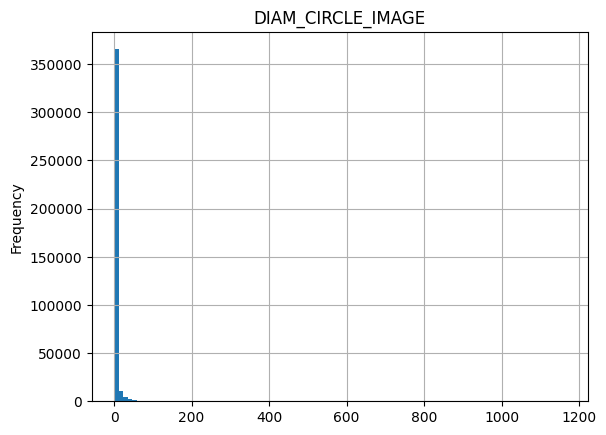

In [7]:
# plot diameter distribution
df.DIAM_CIRCLE_IMAGE.plot(kind='hist', bins=100)
plt.title('DIAM_CIRCLE_IMAGE')
plt.grid()
plt.show()

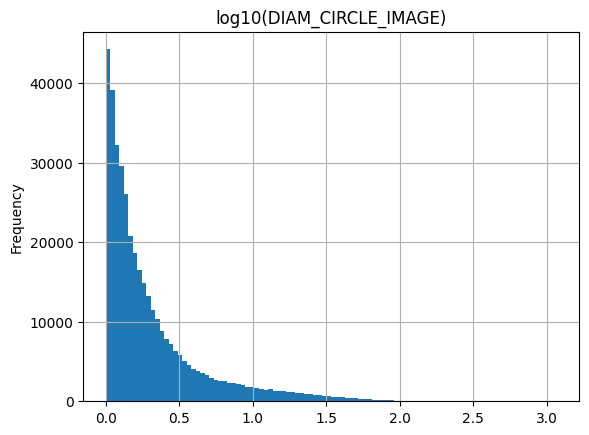

In [8]:
# logarithmic plot
np.log10(df.DIAM_CIRCLE_IMAGE).plot(kind='hist', bins=100)
plt.title('log10(DIAM_CIRCLE_IMAGE)')
plt.grid()
plt.show()

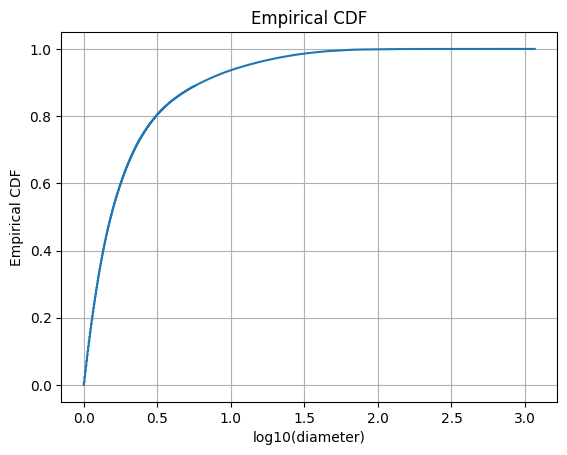

In [9]:
# empirical CDF of log10(diameter)
ecdf = ECDF(np.log10(df.DIAM_CIRCLE_IMAGE))
plt.plot(ecdf.x, ecdf.y)
plt.title('Empirical CDF')
plt.xlabel('log10(diameter)')
plt.ylabel('Empirical CDF')
plt.grid()
plt.show()

C:\Users\Prayag Chawla\AppData\Local\Temp\ipykernel_25220\3252336292.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(ecdf.x, np.log10(1-ecdf.y))


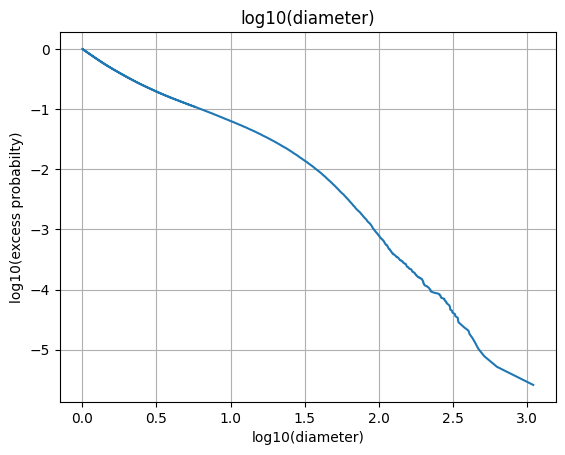

In [10]:
# log-log-plot of 1-CDF
plt.plot(ecdf.x, np.log10(1-ecdf.y))
plt.xlabel('log10(diameter)')
plt.ylabel('log10(excess probabilty)')
plt.title('log10(diameter)')
plt.grid()
plt.show()

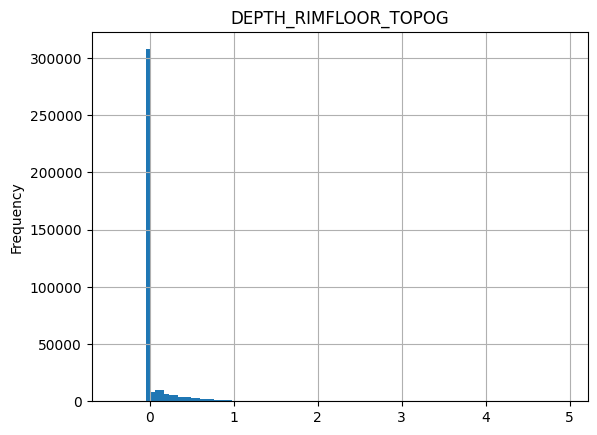

In [11]:
# plot depth distribution
df.DEPTH_RIMFLOOR_TOPOG.plot(kind='hist', bins=100)
plt.title('DEPTH_RIMFLOOR_TOPOG')
plt.grid()
plt.show()

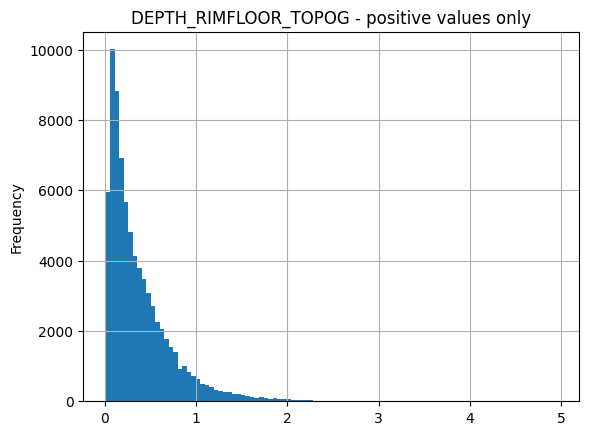

In [12]:
# let's get more details by looking only at the positive values
df[df.DEPTH_RIMFLOOR_TOPOG>0].DEPTH_RIMFLOOR_TOPOG.plot(kind='hist', bins=100)
plt.title('DEPTH_RIMFLOOR_TOPOG - positive values only')
plt.grid()
plt.show()

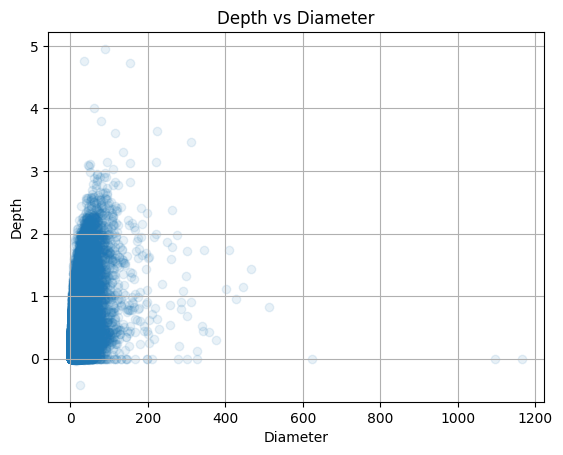

In [13]:
# scatter plot depth vs diameter
plt.scatter(df.DIAM_CIRCLE_IMAGE, df.DEPTH_RIMFLOOR_TOPOG, alpha=0.1)
plt.title('Depth vs Diameter')
plt.xlabel('Diameter')
plt.ylabel('Depth')
plt.grid()
plt.show()

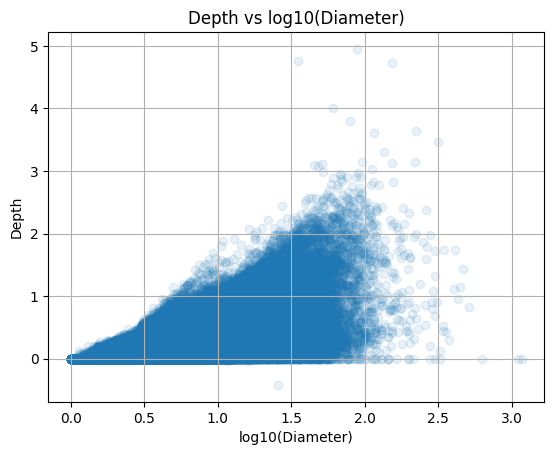

In [14]:
# scatter plot depth vs diameter - diameter in log scale
plt.scatter(np.log10(df.DIAM_CIRCLE_IMAGE), df.DEPTH_RIMFLOOR_TOPOG, alpha=0.1)
plt.title('Depth vs log10(Diameter)')
plt.xlabel('log10(Diameter)')
plt.ylabel('Depth')
plt.grid()
plt.show()

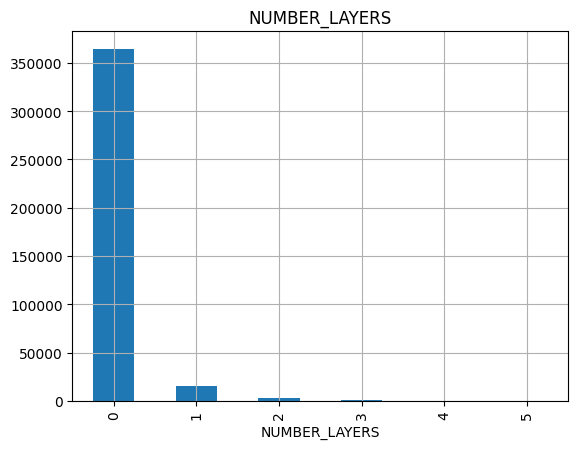

In [15]:
# number of layers distribution
df.NUMBER_LAYERS.value_counts().plot(kind='bar')
plt.title('NUMBER_LAYERS')
plt.grid()
plt.show()

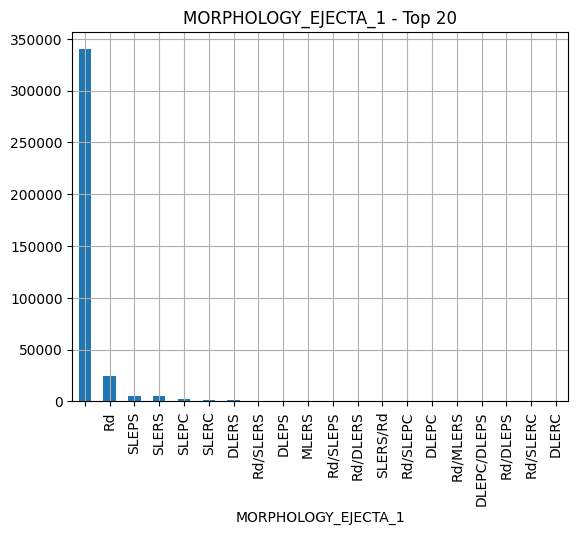

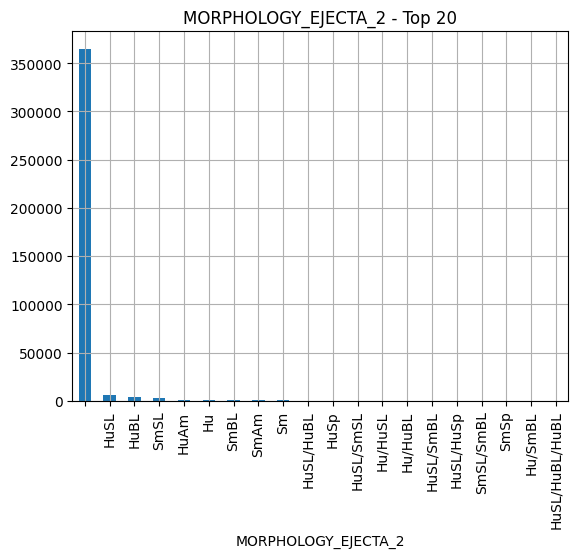

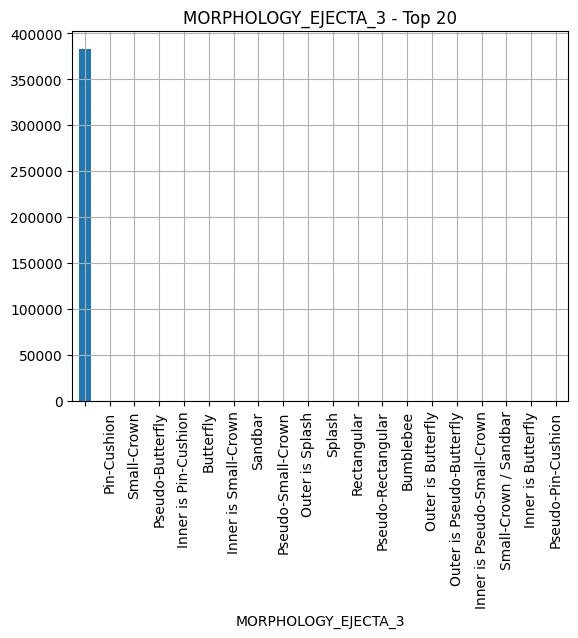

In [16]:
# plot morphologies
morph_list = ['MORPHOLOGY_EJECTA_1','MORPHOLOGY_EJECTA_2','MORPHOLOGY_EJECTA_3']
for m in morph_list:
    df[m].value_counts()[0:20].plot(kind='bar')
    plt.title(m + ' - Top 20')
    plt.grid()
    plt.show()

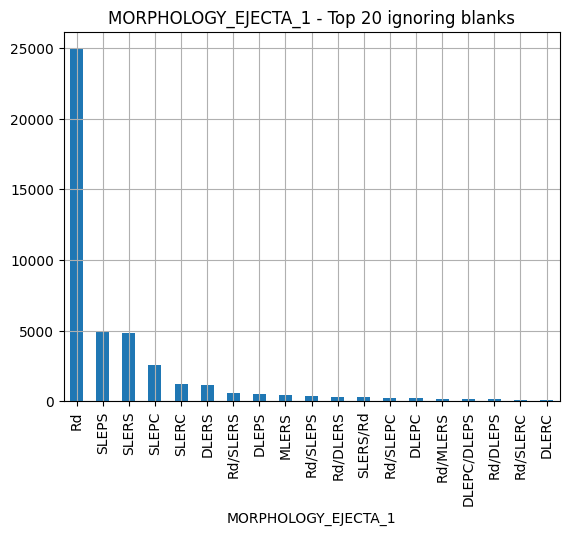

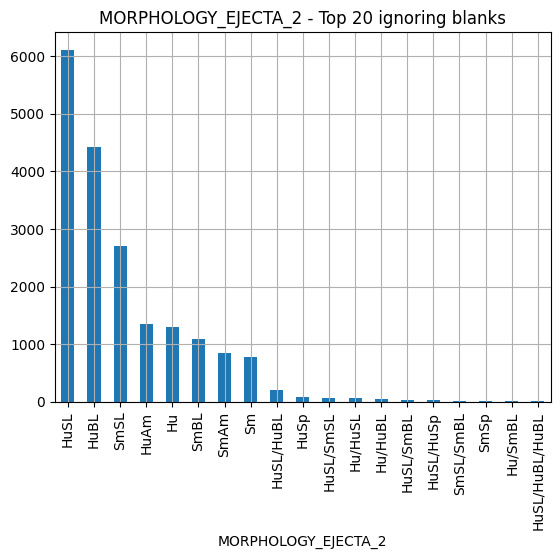

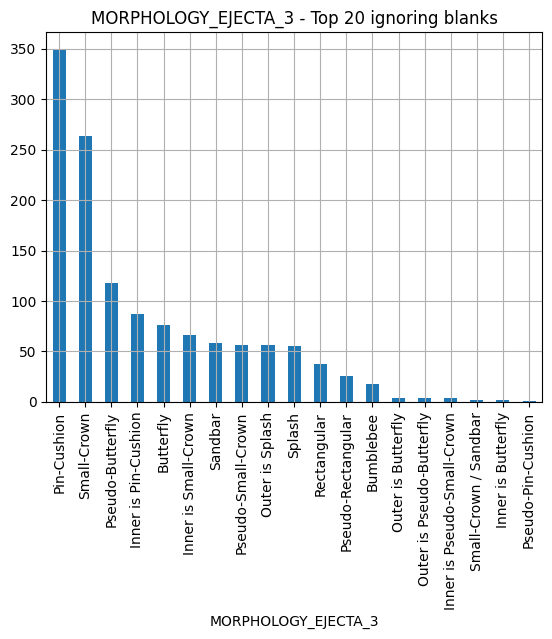

In [17]:
# plot morphologies again igoring the blanks
morph_list = ['MORPHOLOGY_EJECTA_1','MORPHOLOGY_EJECTA_2','MORPHOLOGY_EJECTA_3']
for m in morph_list:
    df[m].value_counts()[1:20].plot(kind='bar')
    plt.title(m + ' - Top 20 ignoring blanks')
    plt.grid()
    plt.show()

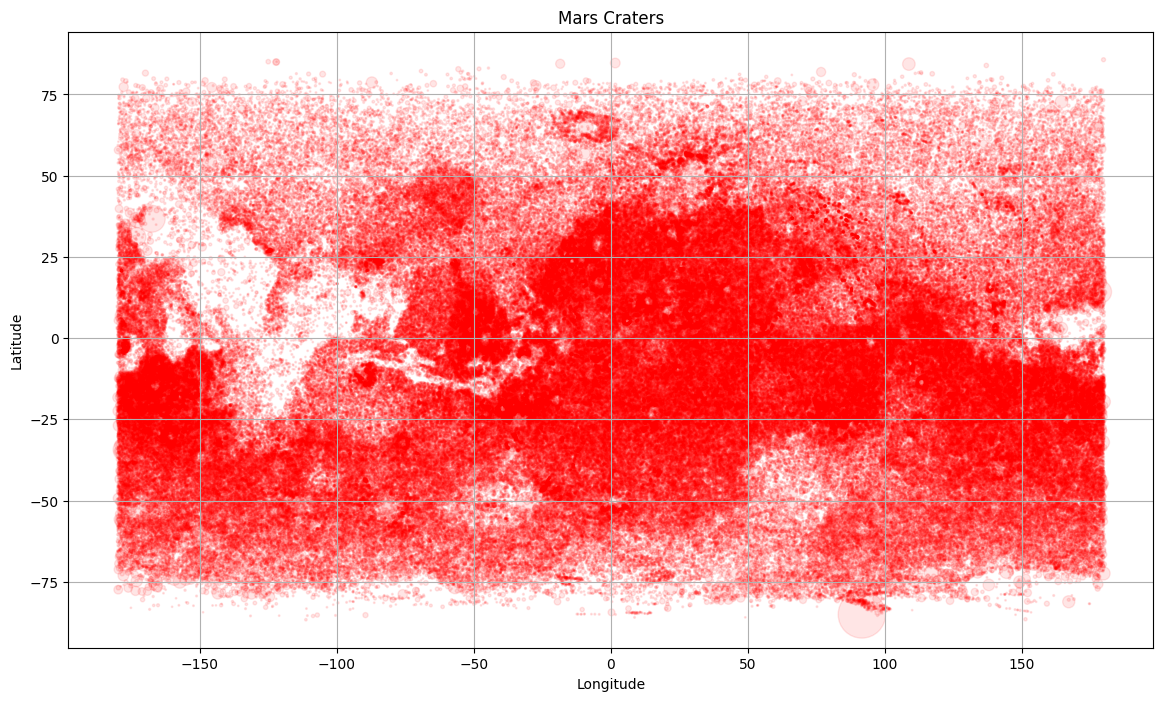

In [18]:
# static plot of all craters
plt.figure(figsize=(14,8))
plt.scatter(x=df.LONGITUDE_CIRCLE_IMAGE,
            y=df.LATITUDE_CIRCLE_IMAGE,
            s=df.DIAM_CIRCLE_IMAGE,
            color='red',
            alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.title('Mars Craters')
plt.show()

OptionError: No such keys(s): 'mode.use_inf_as_null'

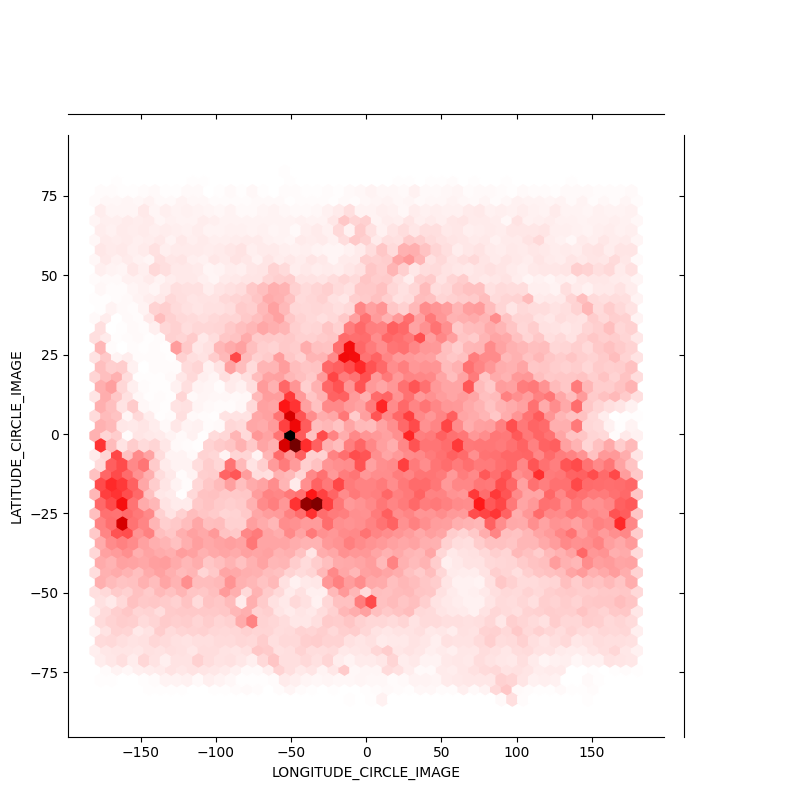

In [19]:
# plot the "density" (hexbin) and the marginals distributions of lat/lon
sns.jointplot(data=df, x='LONGITUDE_CIRCLE_IMAGE',
              y='LATITUDE_CIRCLE_IMAGE', kind='hex', color='red',
              height=8)
plt.show()

2070 craters > 50 km.


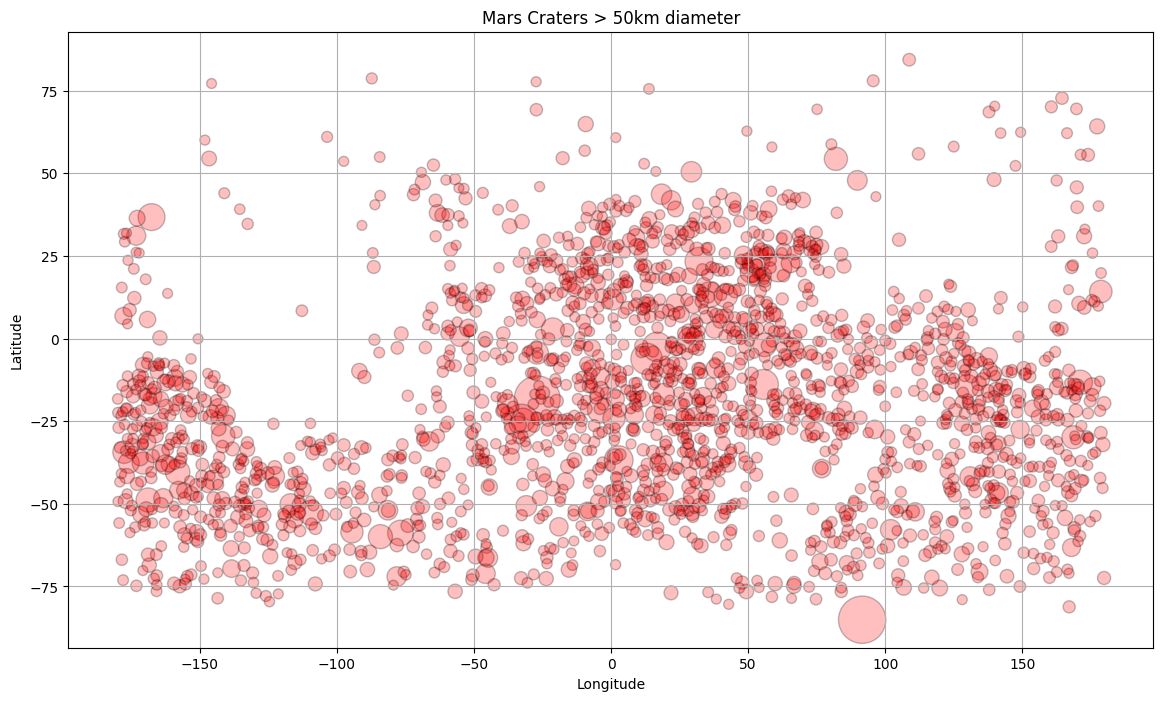

In [20]:
# static plot of craters
df_large = df[df.DIAM_CIRCLE_IMAGE>50]
print(df_large.shape[0], 'craters > 50 km.')

plt.figure(figsize=(14,8))
plt.scatter(x=df_large.LONGITUDE_CIRCLE_IMAGE,
            y=df_large.LATITUDE_CIRCLE_IMAGE,
            s=df_large.DIAM_CIRCLE_IMAGE,
            edgecolors='black',
            linewidths=1,
            color='red',
            alpha=0.25)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.title('Mars Craters > 50km diameter')
plt.show()

In [21]:
n_top = 20
df_top = df.sort_values(by='DIAM_CIRCLE_IMAGE', ascending=False)[0:n_top].copy()
df_top

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
370652,30-000000,Prometheus,-85.075,91.590,1164.22,0.00,,,,0
188253,19-000000,Ladon,-18.240,-26.912,1096.65,0.00,,,,0
188254,19-000001,,-25.097,-32.734,624.50,0.00,,,,0
208705,20-000000,,-6.130,12.963,512.75,0.82,,,,0
227409,21-000000,Huygens,-13.882,55.582,467.25,1.44,,,,0
208706,20-000001,Schiaparelli,-2.508,16.800,445.76,1.14,,,,0
331046,27-000000,,-36.774,2.813,427.15,0.95,,,,0
96929,12-000000,Cassini,23.351,32.110,408.23,1.73,,,,0
115794,13-000000,Antoniadi,21.382,60.831,400.95,1.12,,,,0
6405,02-000000,,36.748,-167.572,376.35,0.29,,,,0


In [22]:
fig = px.scatter(df_top, x='LONGITUDE_CIRCLE_IMAGE', y='LATITUDE_CIRCLE_IMAGE',
                 color='DEPTH_RIMFLOOR_TOPOG', size='DIAM_CIRCLE_IMAGE', 
                 hover_name='CRATER_NAME', opacity=0.5)
fig.update_layout(title='Largest Mars Craters',
                  xaxis_title='Longitude',  
                  yaxis_title='Latitude')
fig.show()

In [23]:
n_top = 20
df_top_d = df.sort_values(by='DEPTH_RIMFLOOR_TOPOG', ascending=False)[0:n_top].copy()
df_top_d

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
173696,18-000004,,-16.312,-50.160,88.51,4.95,,,,0
173758,18-000066,,-10.080,-51.454,35.01,4.75,,,,0
266813,23-000004,Gale,-5.367,137.811,154.08,4.72,,,,0
173714,18-000022,,-4.229,-84.534,60.79,4.01,MLERS,HuBL,Inner is Small-Crown,4
173702,18-000010,,-2.945,-52.160,78.85,3.80,Rd,,,0
316260,26-000000,Galle,-50.645,-30.879,223.02,3.64,Rd,,,0
173692,18-000000,Orson Welles,-0.128,-45.841,115.99,3.60,Rd,,,0
284473,24-000000,Newton,-40.428,-158.061,312.44,3.47,,,,0
316266,26-000006,Hale,-35.682,-36.355,135.65,3.31,Rd,,,0
188267,19-000014,,-21.887,-39.571,95.60,3.14,Rd,,,0


In [25]:
# interactive plot of DEEPEST craters - visualize depth using color
fig = px.scatter(df_top_d, x='LONGITUDE_CIRCLE_IMAGE', y='LATITUDE_CIRCLE_IMAGE',
                 color='DEPTH_RIMFLOOR_TOPOG', size='DIAM_CIRCLE_IMAGE', 
                 hover_name='CRATER_NAME', opacity=0.5)
fig.update_layout(title='Deepest Mars Craters',
                  xaxis_title='Longitude',  
                  yaxis_title='Latitude')
fig.show()

In [26]:
# for the following remove craters with blank as "name"
df_named = df[df['CRATER_NAME'] != ' ']
df_named.shape

(987, 10)

In [27]:
df_named[df_named.CRATER_NAME.str.len() == 1]

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
67376,10-000106,S,21.430,-55.151,28.45,1.52,MLERS,HuBL,,3
74155,10-006885,C,23.137,-49.021,1.38,0.00,,,,0
81008,11-000817,P,20.619,-41.116,11.24,0.95,SLERS,HuSL,,1
208719,20-000014,M,-10.654,2.766,124.16,0.96,,,,0
228033,21-000624,J,-27.185,76.450,20.47,1.51,DLERS,HuSL,,2
247391,22-000003,M,-25.749,127.913,120.52,0.93,Rd,,,0
316809,26-000549,T,-35.499,-58.310,19.11,0.52,,,,0
316879,26-000619,V,-43.609,-53.690,17.24,0.79,,,,0
344997,28-000021,P,-31.308,108.707,72.49,2.20,Rd,,,0


In [28]:
# check frequency / uniqueness
df_named.CRATER_NAME.value_counts()

CRATER_NAME
P             2
M             2
Korolev       1
Fournier      1
Wislicenus    1
             ..
Peridier      1
Leighton      1
Hargraves     1
Jezero        1
Dzeng         1
Name: count, Length: 985, dtype: int64

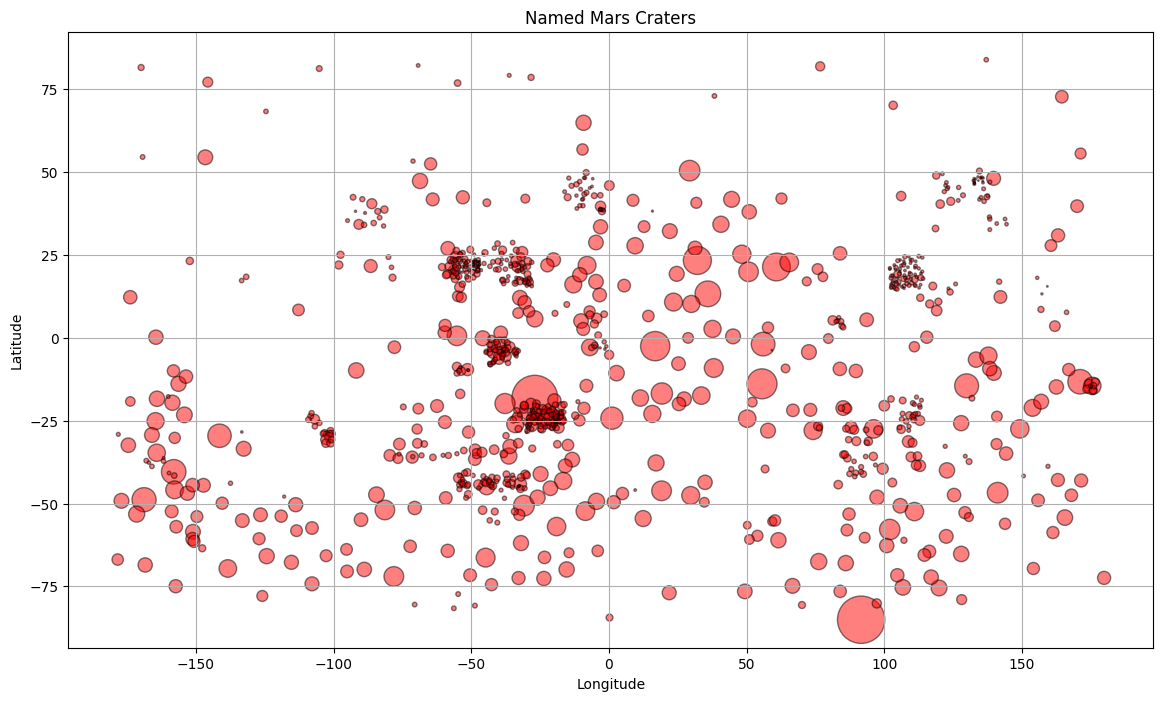

In [29]:
plt.figure(figsize=(14,8))
plt.scatter(x=df_named.LONGITUDE_CIRCLE_IMAGE,
            y=df_named.LATITUDE_CIRCLE_IMAGE,
            s=df_named.DIAM_CIRCLE_IMAGE,
            edgecolors='black',
            linewidths=1,
            color='red',
            alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.title('Named Mars Craters')
plt.show()

In [30]:
# interactive plot of NAMED craters - visualize depth using color
fig = px.scatter(df_named, x='LONGITUDE_CIRCLE_IMAGE', y='LATITUDE_CIRCLE_IMAGE',
                 color='DEPTH_RIMFLOOR_TOPOG', size='DIAM_CIRCLE_IMAGE', 
                 hover_name='CRATER_NAME', opacity=0.5)
fig.update_layout(title='Named Mars Craters',
                  xaxis_title='Longitude',
                  yaxis_title='Latitude')
fig.show()

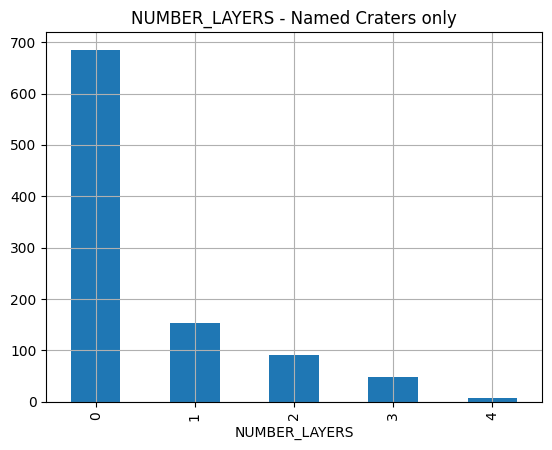

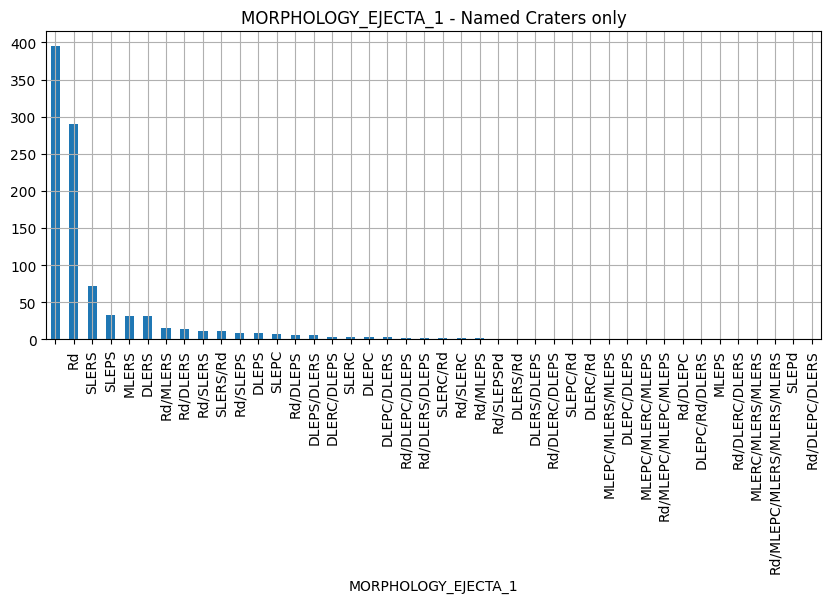

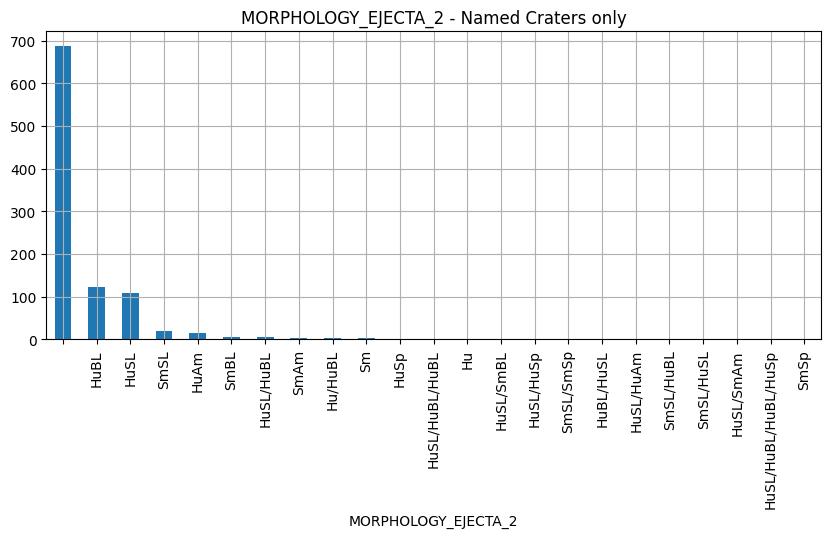

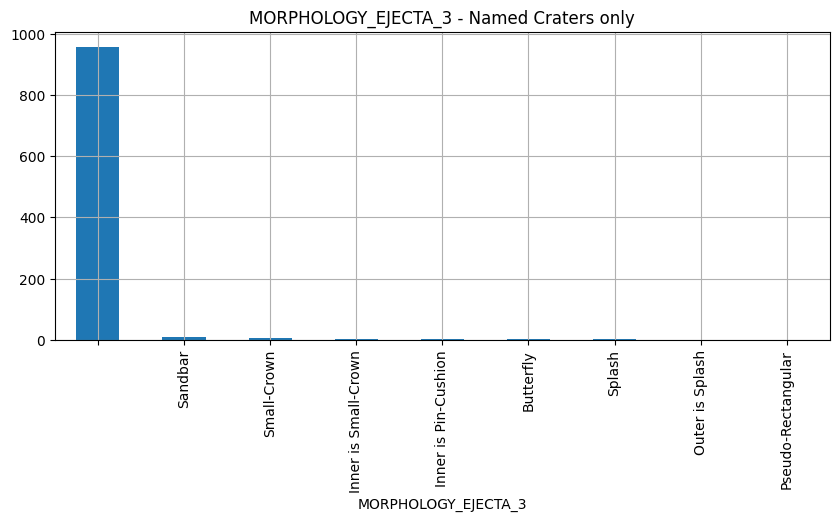

In [31]:
df_named.NUMBER_LAYERS.value_counts().plot(kind='bar')
plt.title('NUMBER_LAYERS - Named Craters only')
plt.grid()
plt.show()

morph_list = ['MORPHOLOGY_EJECTA_1','MORPHOLOGY_EJECTA_2','MORPHOLOGY_EJECTA_3']
for m in morph_list:
    plt.figure(figsize=(10,4))
    df_named[m].value_counts().plot(kind='bar')
    plt.title(m + ' - Named Craters only')
    plt.grid()
    plt.show()